In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("cardekho_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(2)

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.duplicated().sum()

np.int64(0)

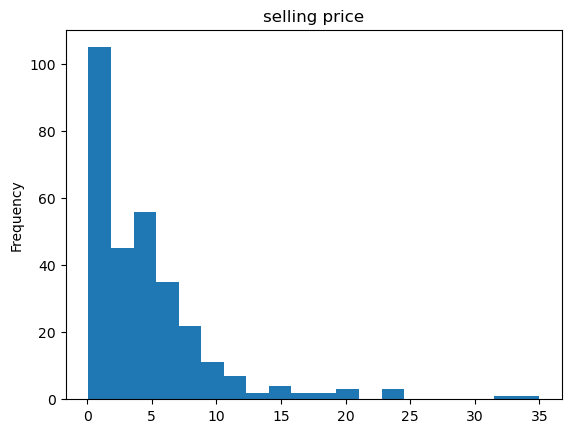

In [25]:
import matplotlib.pyplot as plt
df["Selling_Price"].plot(kind = "hist", bins = 20, title = "selling price") 
plt.show()

In [26]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [29]:
fuel_type_avg_price = df.groupby("Fuel_Type")["Selling_Price"].mean()

In [30]:
fuel_type_avg_price

Fuel_Type
CNG        3.100000
Diesel    10.102759
Petrol     3.264184
Name: Selling_Price, dtype: float64

<Axes: title={'center': 'Avg selling price by fule type'}, xlabel='Fuel_Type'>

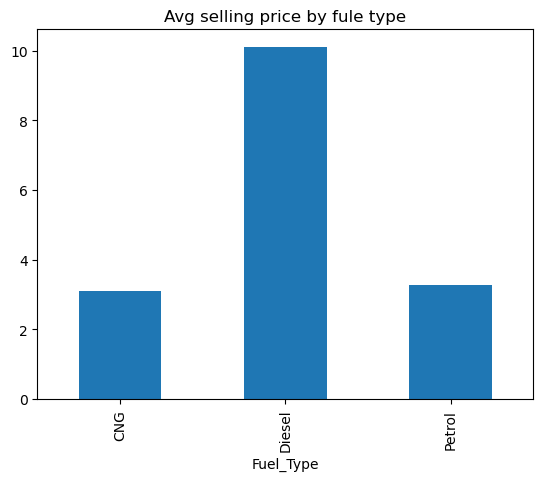

In [31]:
fuel_type_avg_price.plot(kind = "bar" , title = "Avg selling price by fule type")

In [32]:
transmission_count =df["Transmission"].value_counts()

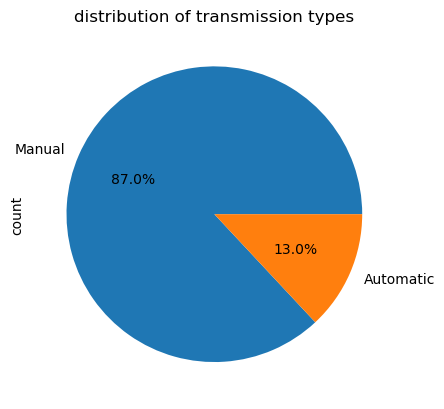

In [37]:
transmission_count.plot(kind = "pie" , autopct = "%1.1f%%" , title = "distribution of transmission types")
plt.show()

In [38]:
seller_type_total_present_price = df.groupby("Seller_Type")["Present_Price"].sum()

In [39]:
seller_type_total_present_price

Seller_Type
Dealer        2081.43
Individual     173.34
Name: Present_Price, dtype: float64

In [40]:
yearly_avg_kms_driven = df.groupby("Year")["Kms_Driven"].mean()

In [41]:
yearly_avg_kms_driven

Year
2003     94500.000000
2004    135154.000000
2005    104294.000000
2006     87422.250000
2007     51000.000000
2008    112128.571429
2009     67820.500000
2010     60014.066667
2011     40327.368421
2012     43798.217391
2013     41534.333333
2014     38080.315789
2015     31977.683333
2016     17885.040816
2017     10419.800000
2018      2071.000000
Name: Kms_Driven, dtype: float64

In [44]:
fuel_transmission_max_selling_price = df.groupby(["Fuel_Type" , "Transmission"])["Selling_Price"].max()

In [45]:
fuel_transmission_max_selling_price

Fuel_Type  Transmission
CNG        Manual           3.25
Diesel     Automatic       33.00
           Manual          35.00
Petrol     Automatic       19.75
           Manual          17.00
Name: Selling_Price, dtype: float64

Text(0, 0.5, 'selling_price')

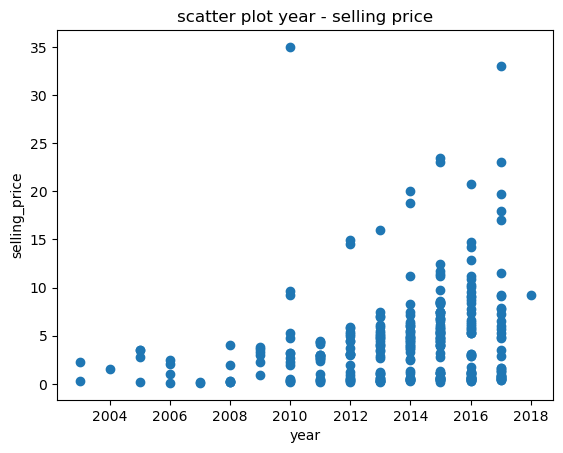

In [48]:
plt.scatter(df["Year"], df["Selling_Price"])
plt.title("scatter plot year - selling price")
plt.xlabel("year")
plt.ylabel("selling_price")

Text(0, 0.5, 'kms driven')

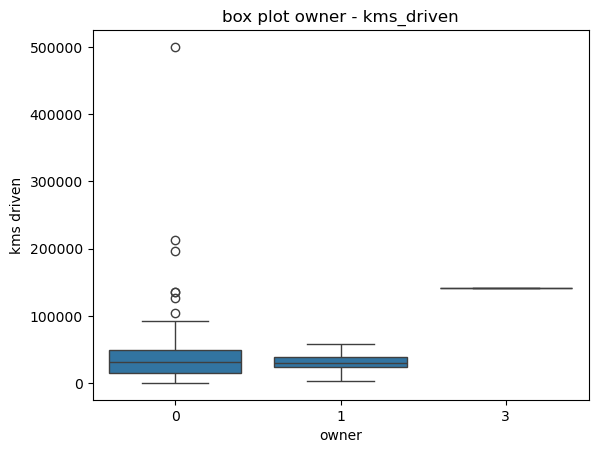

In [49]:
sns.boxplot(x="Owner" , y="Kms_Driven" , data = df)
plt.title("box plot owner - kms_driven")
plt.xlabel("owner")
plt.ylabel("kms driven")

Text(0, 0.5, 'avg price')

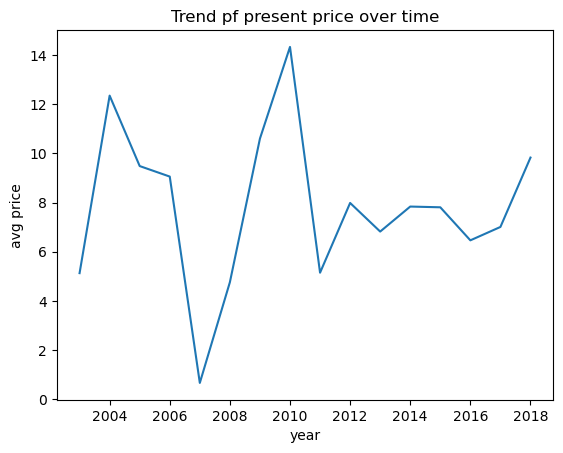

In [51]:
plt.plot(df.groupby("Year")["Present_Price"].mean() )
plt.title("Trend pf present price over time")
plt.xlabel("year")
plt.ylabel("avg price")

Text(0.5, 1.0, 'Avg selling price by fuel and transmission')

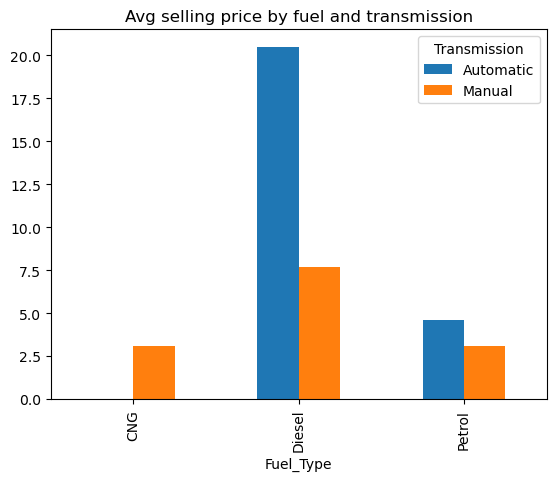

In [55]:
df.groupby(["Fuel_Type" , "Transmission" ]) ["Selling_Price"].mean().unstack().plot(kind="bar")
plt.title("Avg selling price by fuel and transmission")

Text(0.5, 1.0, 'kms driven over time by fuel type')

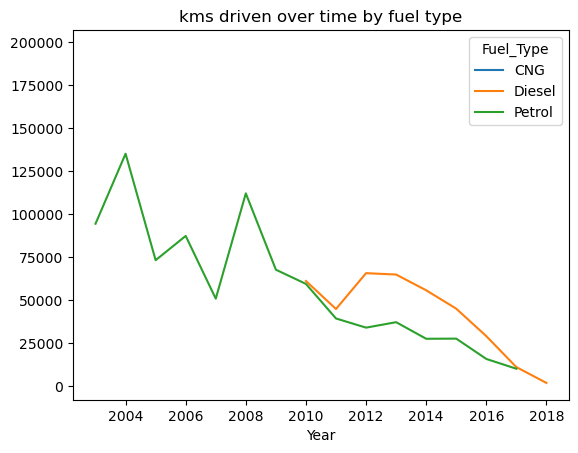

In [60]:
df.groupby(["Year", "Fuel_Type"])["Kms_Driven"].mean().unstack().plot(kind="line")
plt.title("kms driven over time by fuel type")

In [61]:
y =df["Selling_Price"]

In [63]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [69]:
x=df[["Year" , "Kms_Driven" , "Fuel_Type" , "Owner" , "Transmission" ]]

In [70]:
x

,Year,Kms_Driven,Fuel_Type,Owner,Transmission
0,2014,27000,Petrol,0,Manual
1,2013,43000,Diesel,0,Manual
2,2017,6900,Petrol,0,Manual
3,2011,5200,Petrol,0,Manual
4,2014,42450,Diesel,0,Manual
...,...,...,...,...,...
296,2016,33988,Diesel,0,Manual
297,2015,60000,Petrol,0,Manual
298,2009,87934,Petrol,0,Manual
299,2017,9000,Diesel,0,Manual


In [74]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [78]:
x ["Fuel_Type"] = labelencoder.fit_transform(x["Fuel_Type"])
x ["Transmission"] = labelencoder.fit_transform(x["Transmission"])

C:\Users\q8fen\AppData\Local\Temp\ipykernel_13416\1700827855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x ["Fuel_Type"] = labelencoder.fit_transform(x["Fuel_Type"])
C:\Users\q8fen\AppData\Local\Temp\ipykernel_13416\1700827855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x ["Transmission"] = labelencoder.fit_transform(x["Transmission"])


In [79]:
x

,Year,Kms_Driven,Fuel_Type,Owner,Transmission
0,2014,27000,2,0,1
1,2013,43000,1,0,1
2,2017,6900,2,0,1
3,2011,5200,2,0,1
4,2014,42450,1,0,1
...,...,...,...,...,...
296,2016,33988,1,0,1
297,2015,60000,2,0,1
298,2009,87934,2,0,1
299,2017,9000,1,0,1


In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split( x,y, test_size= 0.2)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [106]:
def modelresults(predictions):
    print("Mean absolute error is {}" .format(mean_absolute_error(y_test , predictions)))
    print("Root mean squared error is {}". format(np.sqrt(mean_squared_error(y_test,predictions))))

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lr =LinearRegression()

In [110]:
lr.fit(scaled_x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
predslr =  lr.predict(scaled_x_test)

In [113]:
modelresults(predslr)

Mean absolute error is 3.0155795155184846
Root mean squared error is 3.970495181391823


In [114]:
from sklearn.metrics import r2_score
r2_score(y_test,predslr)

0.2875126047625969

In [128]:
from sklearn.svm import SVR

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
svrmodel = SVR()

In [131]:
param_gridsvr = {"C" : [0.1,0.5], "kernel" : ["linear" , "rbf" , "poly" ] , "degree" :[2,3,4] }

In [132]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)

In [133]:
gridsvr.fit(scaled_x_train,y_train)

,estimator,SVR()
,param_grid,"{'C': [0.1, 0.5], 'degree': [2, 3, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'poly'


In [134]:
gridsvr.best_params_

{'C': 0.5, 'degree': 2, 'kernel': 'poly'}

In [135]:
predsgridsvr = gridsvr.predict(scaled_x_test)

In [136]:
modelresults(predsgridsvr)

Mean absolute error is 2.7683453705365744
Root mean squared error is 4.129293719822105


In [137]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
rfrmodel = RandomForestRegressor()
param_gridrfr = {"max_depth" : [5,10], "n_estimators" :[2,5,8]}
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [142]:
gridrfr.fit(scaled_x_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 10], 'n_estimators': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,5


In [143]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 5}

In [144]:
predsgridrfr = gridrfr.predict(scaled_x_test)

In [145]:
modelresults(predsgridrfr)

Mean absolute error is 3.3710268582724447
Root mean squared error is 5.159472644108676


In [146]:
rf = RandomForestRegressor(n_estimators=500,random_state=42,n_jobs=-1)


In [147]:
rf.fit(x_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [150]:
rf_pred = rf.predict(x_test)
print("RF MAE:", mean_absolute_error(y_test, rf_pred))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))

RF MAE: 2.9463310634920634
RF RMSE: 4.45590460112369
